<center>
    <h1>Deep Learning for Natural Language Processing</h1>
</center>

In this notebook we will develop a **sentiment classifier** on a given English-language **Twitter Dataset** containing some user comments. The main goal is to build a model that understands whether a specific comment has a **positive** sentiment or a **negative** sentiment.

## Loading the Datasets 📥🗂️

We will  begin by importing the **dataset** we are going to work with. The provided dataset consists of **3 CSV files** each one having its significant role in the process. We have the **training**, **validating** and **testing** files.
1. The training file is going to be used to train our model.
2. The validating file will tell us how good our model is by computing its accuracy.
3. The testing file is going to be used to test our model and extract some results and statistics.

Let's load our dataset files that are located in the `/Data/` directory.

In [63]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

# Load all the dataset files using pandas and store inside some dataframe variables
train_df = pd.read_csv('../Data/train_dataset.csv')
val_df = pd.read_csv('../Data/val_dataset.csv')
test_df = pd.read_csv('../Data/test_dataset.csv')

Let's take a look at some of the records of the training dataset.

In [64]:
train_df.head()

,ID,Text,Label
0,189385,@whoisralphie dude I'm so bummed ur leaving!,0
1,58036,"oh my god, a severed foot was foun in a wheely...",0
2,190139,I end up &quot;dog dialing&quot; sumtimes. Wha...,1
3,99313,@_rachelx meeeee toooooo!,0
4,157825,"I was hoping I could stay home and work today,...",0


### Data sizes 📏📐

Let's have a look at the **sizes** of these datasets. In machine learning a **suitable size** of training, validating and testing data is around 70%, 20% and 10% respectively. 

Training Dataset size: 445164
Validating Dataset size: 127188
Testing Dataset size: 42398


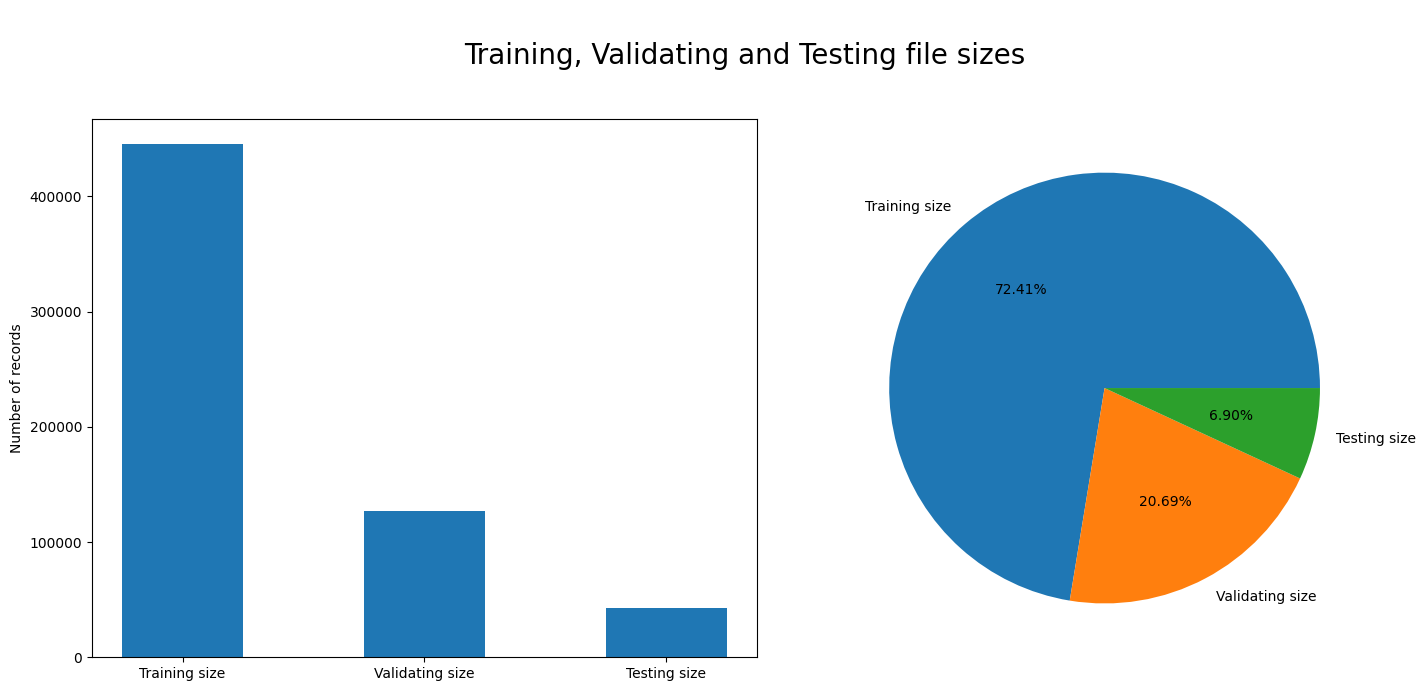

In [65]:
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms

train_size = train_df.size
val_size = val_df.size
test_size = test_df.size

print(f"Training Dataset size: {train_size}")
print(f"Validating Dataset size: {val_size}")
print(f"Testing Dataset size: {test_size}")

sizes = [train_size, val_size, test_size]
labels = ["Training size", "Validating size", "Testing size"]

fig, axes = plt.subplots(1, 2, figsize=(15, 7))
axes[0].bar(labels, sizes, width=0.5)
axes[0].set_ylabel("Number of records")

axes[1].pie(sizes, labels=labels, autopct="%1.2f%%")

plt.suptitle("\nTraining, Validating and Testing file sizes\n", fontsize=20)
plt.tight_layout()
plt.savefig("../plots/dataset_file_sizes.png")
plt.show()

From the results above we can easily tell that our dataset files satisfy the data splitting criterion.

### Data Analysis and Cleaning 📈📊🧹

The first step of the whole process is to **pre-process** and **clean** our dataset files. In Machine Learning and AI applications, this is the initial and really important step. We will focus on
1. Transform shortcuts like **"I'm" to "I am"**.
2. Removing **URLs**, **User mentions**, **Hashtags** and **special characters**.
3. **Lowercasing** the texts
4. Removing **extra spaces** and **line breaks**
5. Handling **duplicates** and **missing values**

Let's begin by implementing a **function** that will handle the data pre-processing for a given string.

In [66]:
import re
import contractions

def clean_text(text: str) -> str:
    text = contractions.fix(text)
    text = re.sub(r"http\S+|www\S+|https\S+", "", text) # Remove url links
    text = re.sub(r"@\w+", "", text) # Remove mentions
    text = re.sub(r"#", "", text) # Remove hastags
    text = re.sub(r"&[^;\s]+;", "", text) # Remove special characters
    text = text.lower() # Convert to lowercase
    text = re.sub(r"\s+", " ", text) # Remove extra spaces
    
    return text

Let's apply this function to the 3 dataset files, and see the results.

In [67]:
# Apply the cleaning function to every dataset file and create a new column with the modified text
train_df["Cleaned_text"] = train_df["Text"].apply(clean_text)
val_df["Cleaned_text"] = val_df["Text"].apply(clean_text)
test_df["Cleaned_text"] = test_df["Text"].apply(clean_text)

train_df.head(10)

,ID,Text,Label,Cleaned_text
0,189385,@whoisralphie dude I'm so bummed ur leaving!,0,dude i am so bummed you are leaving!
1,58036,"oh my god, a severed foot was foun in a wheely...",0,"oh my god, a severed foot was foun in a wheely..."
2,190139,I end up &quot;dog dialing&quot; sumtimes. Wha...,1,i end up dog dialing sumtimes. what is dog dia...
3,99313,@_rachelx meeeee toooooo!,0,meeeee toooooo!
4,157825,"I was hoping I could stay home and work today,...",0,"i was hoping i could stay home and work today,..."
5,130560,says plurk karma finally reached the 50s. stil...,0,says plurk karma finally reached the 50s. stil...
6,121871,"Good to hear it @Arth This is a bit more, but ...",1,"good to hear it this is a bit more, but a la f..."
7,86813,@davorg in that case im gonna start tweeting a...,1,in that case i am going to start tweeting abo...
8,197517,"@belunyc its alright love, how are you?",1,"its alright love, how are you?"
9,6937,@brightondoll haha that has to be the best ana...,1,haha that has to be the best analogy ever. mo...


We will no proceed to **analyze** the **training dataset**. We are going to focus on the **words** of each tweet and extract the most frequent ones, by generating a **Word Cloud** and a **Bar Plot**.

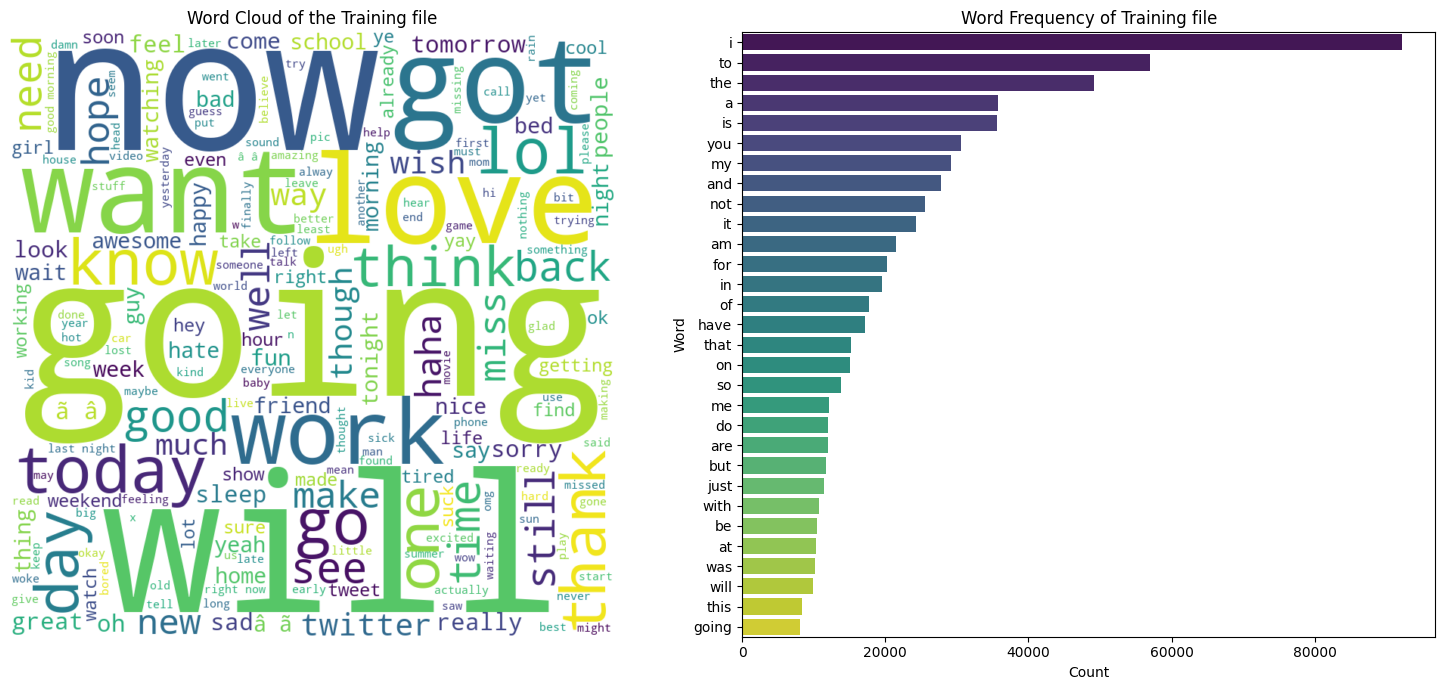

In [68]:
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns

def analize_words(df: pd.DataFrame, column: str, filename: str):
    all_text = " ".join(df[column])
    all_words = " ".join(df[column]).split()
    
    word_counts = Counter(all_words)
    most_common_words = word_counts.most_common(30)
    
    common_df = pd.DataFrame(most_common_words, columns=["Word", "Count"])
    
    wordcloud = WordCloud(width=800, height=800, background_color="#FFF")
    wordcloud.generate(all_text)
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 7))
    axes[0].imshow(wordcloud, interpolation="bilinear")
    axes[0].axis("off")
    axes[0].set_title("Word Cloud of the Training file")
    
    sns.barplot(x="Count", y="Word", data=common_df, palette="viridis", ax=axes[1])
    axes[1].set_title("Word Frequency of Training file")
    
    plt.savefig(filename)
    plt.tight_layout()
    plt.show()

analize_words(train_df, 'Cleaned_text', '../plots/word_cloud_tokens_frequency.png')

The above graphs reveal to us the frequency of some words inside the dataset. The plot on the right appears to have words that are not practically useful. These words are called **stopwords** and the `wordcloud` Python package automatically ignores them. That's because we have different results on the left and right plots. Having stopwords in our dataset is not a good practice for sentiment analysis because stopwords do not add much meaning. So we will take care of them by removing them from the dataset.

In [69]:
import nltk
from nltk import data
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import time

warnings.filterwarnings("ignore", category=UserWarning, module="nltk")
nltk.download('stopwords')

def remove_stopwords(text: str) -> str:
    # Remove the stopwords from the original text
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_words = [word for word in word_tokens if word not in stop_words]

    return " ".join(filtered_words)

start_time = time.time()
train_df['Cleaned_text'] = train_df['Cleaned_text'].apply(remove_stopwords)
val_df['Cleaned_text'] = val_df['Cleaned_text'].apply(remove_stopwords)
test_df['Cleaned_text'] = test_df['Cleaned_text'].apply(remove_stopwords)
end_time = time.time()

print(f"Stopwords were removed in {end_time - start_time} seconds.")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Antonis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Stopwords were removed in 74.97287464141846 seconds.


By executing the code above we must have removed some useless stopwords from the dataset. Let's have a look at the dataset and the analytics one more time.

In [70]:
train_df.head(10)

,ID,Text,Label,Cleaned_text
0,189385,@whoisralphie dude I'm so bummed ur leaving!,0,dude bummed leaving !
1,58036,"oh my god, a severed foot was foun in a wheely...",0,"oh god , severed foot foun wheely bin cobham !..."
2,190139,I end up &quot;dog dialing&quot; sumtimes. Wha...,1,"end dog dialing sumtimes . dog dialing , ask ?..."
3,99313,@_rachelx meeeee toooooo!,0,meeeee toooooo !
4,157825,"I was hoping I could stay home and work today,...",0,"hoping could stay home work today , looks like..."
5,130560,says plurk karma finally reached the 50s. stil...,0,says plurk karma finally reached 50s . still h...
6,121871,"Good to hear it @Arth This is a bit more, but ...",1,"good hear bit , la four tet know free rotation..."
7,86813,@davorg in that case im gonna start tweeting a...,1,case going start tweeting nymphomanic pub owne...
8,197517,"@belunyc its alright love, how are you?",1,"alright love , ?"
9,6937,@brightondoll haha that has to be the best ana...,1,haha best analogy ever . mogwai gremlin . love...


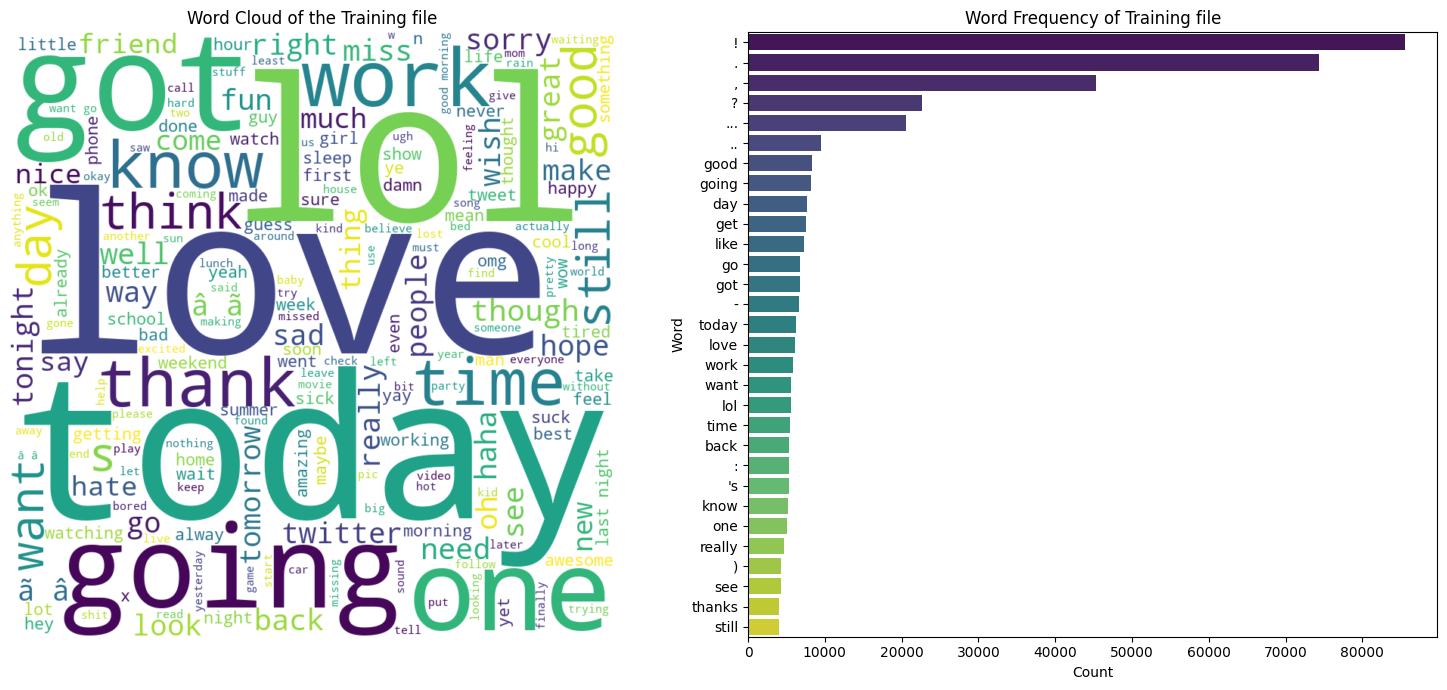

In [71]:
analize_words(train_df, 'Cleaned_text', '../plots/word_cloud_tokens_frequency_without_stopwords.png')

As we expected all the common stopwords like 'I', 'the', 'so' and more have been deleted from the records of the dataset. However we have another error this time refering to punctuation. Symbols like '!', '?' and so on, must not be inside the dataset. Let's delete them and take another look at the statistics.

In [72]:
from nltk.tokenize import word_tokenize
import string

special_punctuation = ['...', '..']

def remove_punctuation(text: str) -> str:
    word_tokens = [w for w in text.split()]
    filtered_words = [word for word in word_tokens if word not in string.punctuation and word not in special_punctuation]
    return " ".join(filtered_words)

train_df['Cleaned_text'] = train_df['Cleaned_text'].apply(remove_punctuation)
val_df['Cleaned_text'] = val_df['Cleaned_text'].apply(remove_punctuation)
test_df['Cleaned_text'] = test_df['Cleaned_text'].apply(remove_punctuation)

In [73]:
train_df.head(10)

,ID,Text,Label,Cleaned_text
0,189385,@whoisralphie dude I'm so bummed ur leaving!,0,dude bummed leaving
1,58036,"oh my god, a severed foot was foun in a wheely...",0,oh god severed foot foun wheely bin cobham fou...
2,190139,I end up &quot;dog dialing&quot; sumtimes. Wha...,1,end dog dialing sumtimes dog dialing ask dogs ...
3,99313,@_rachelx meeeee toooooo!,0,meeeee toooooo
4,157825,"I was hoping I could stay home and work today,...",0,hoping could stay home work today looks like m...
5,130560,says plurk karma finally reached the 50s. stil...,0,says plurk karma finally reached 50s still hea...
6,121871,"Good to hear it @Arth This is a bit more, but ...",1,good hear bit la four tet know free rotation f...
7,86813,@davorg in that case im gonna start tweeting a...,1,case going start tweeting nymphomanic pub owne...
8,197517,"@belunyc its alright love, how are you?",1,alright love
9,6937,@brightondoll haha that has to be the best ana...,1,haha best analogy ever mogwai gremlin love lov...


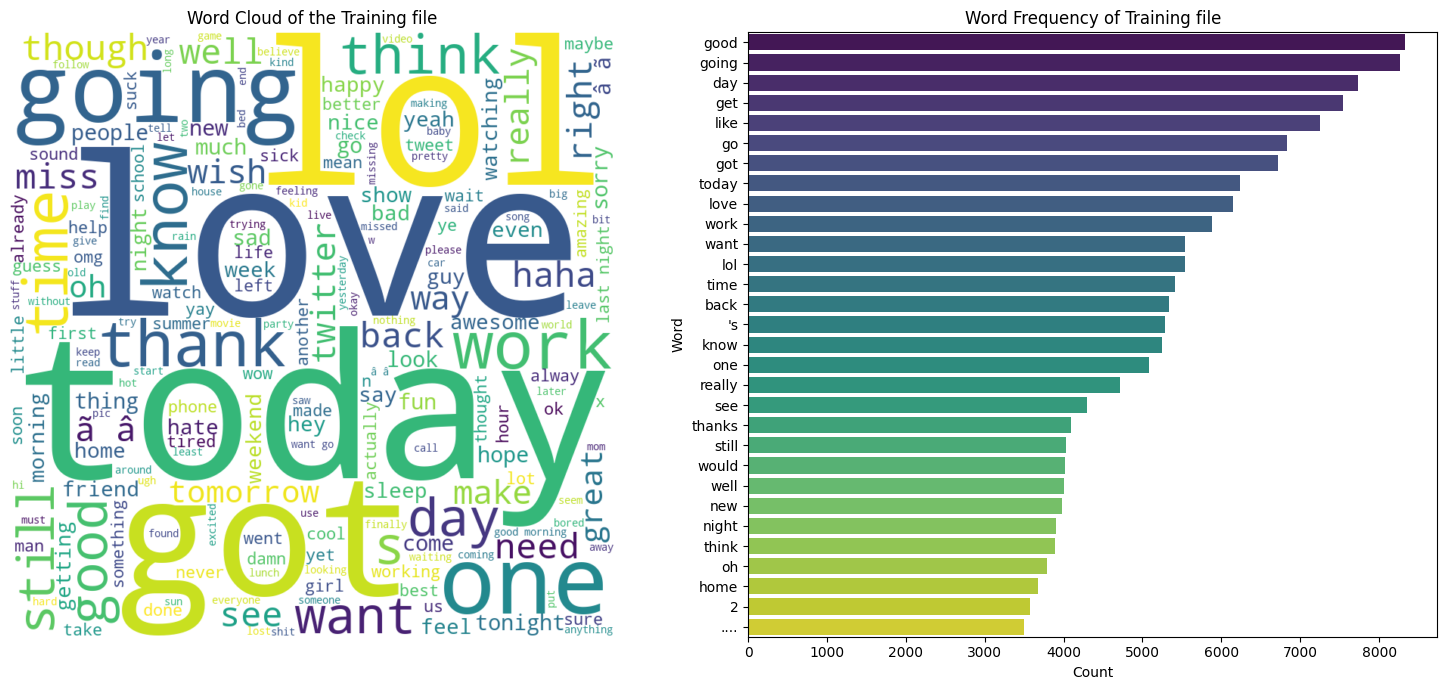

In [74]:
analize_words(train_df, 'Cleaned_text', '../plots/word_cloud_tokens_frequency_no_stopwords_no_punctuation.png')

As we can see the dataset has been cleaned successfully and there not any stopwords or punctuation symbols in the records.

### Deeper Analysis 🔎📊

We are now going to fall into a deeper analysis of the dataset, in order to collect some information about the user comments. First we will attempt to do a **sentiment distribution analsysis** to all 3 dataset files. Specifically we will count the number of tweets for each sentiment in the training, validating and testign files.

In [76]:
def get_sentiment_distribution(df: pd.DataFrame) -> tuple[int, int]:
    positive_count, negative_count = 0, 0
    for 

np.int64(74192)